# Question 1 : What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?


Ensemble techniques combine multiple models to produce a more robust and accurate predictive model than any single model alone. The fundamental idea is that by combining the predictions of several 'weak' or 'base' learners, the ensemble can reduce biases, variance, or both, leading to improved overall performance.

Here's how Bagging and Boosting differ:

Bagging (Bootstrap Aggregating):

Approach: Bagging involves training multiple base models (often of the same type, like decision trees) independently on different subsets of the training data. Each subset is created by bootstrapping, which means sampling with replacement from the original dataset. The final prediction is typically an aggregation of individual model predictions (e.g., averaging for regression, majority voting for classification).
Objective: The primary objective of bagging is to reduce variance. By training models on diverse subsets of data, bagging helps to reduce the impact of noisy data points or overfitting that might occur in a single model. Each model sees a slightly different view of the data, and by averaging their predictions, the ensemble becomes more stable and less sensitive to the specifics of the training data.
Examples: Random Forest is a prominent example of a bagging algorithm, where an ensemble of decision trees is trained using bagging.
Boosting:

Approach: Boosting also combines multiple base models sequentially. However, unlike bagging, boosting trains models iteratively, where each new model tries to correct the errors of the previous ones. It focuses more on misclassified or harder-to-predict instances. Data points that were misclassified by previous models are given higher weights, so subsequent models pay more attention to them.
Objective: The main objective of boosting is to reduce bias and, consequently, improve accuracy. By focusing on the errors of previous models, boosting iteratively builds a strong learner from a series of weak learners. It effectively converts a set of weak learners into a strong learner.
Examples: AdaBoost (Adaptive Boosting), Gradient Boosting Machines (GBM), and XGBoost are well-known examples of boosting algorithms.

# Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.

A Random Forest Classifier is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

Here's how it reduces overfitting compared to a single decision tree:

1.  **Ensemble Averaging/Voting:** A single decision tree can easily overfit the training data, especially if it's allowed to grow very deep, capturing noise and specific patterns in the training set that don't generalize well to unseen data. Random Forests mitigate this by combining predictions from many trees. In classification, the final prediction is often made by majority voting among the trees. This averaging/voting process smooths out the individual trees' idiosyncratic errors and biases, leading to a more generalized and robust model. No single tree's overfitting dictates the final prediction.

2.  **Random Subset of Features (Feature Randomness):** At each split in the tree-building process, a Random Forest doesn't consider all available features. Instead, it randomly selects a subset of features. This 'feature bagging' ensures that different trees in the forest are built using different perspectives of the data, reducing the correlation between individual trees. If there are a few very strong predictors, a standard decision tree might consistently pick them at the top splits, leading to similar, highly correlated trees that overfit. Feature randomness forces other features to be considered, increasing the diversity of the trees and making the ensemble less prone to overfitting due to reliance on a few dominant features.

3.  **Bootstrapping (Bagging - Data Randomness):** Random Forests train each decision tree on a different bootstrap sample (sampling with replacement) of the original training data. This means each tree sees a slightly different subset of the training instances. This randomness in the data each tree sees further decorrelates the trees. When combined, these diverse trees provide a more stable and less biased prediction, as the errors and overfitting patterns of individual trees tend to cancel each other out.

Key Hyperparameters and their Role in Overfitting Reduction:

1.  `n_estimators` (Number of Trees):
    *   **Role:** This hyperparameter determines the number of individual decision trees in the forest. A higher number of trees generally leads to a more stable and robust model. As `n_estimators` increases, the variance of the model decreases because the averaging/voting process becomes more effective in canceling out the individual trees' errors. While increasing this value doesn't typically cause overfitting itself, setting it too low might mean the ensemble hasn't fully leveraged the benefits of combining multiple models, potentially leaving some variance unaddressed.

2.  `max_features` (Maximum Number of Features to Consider for Each Split):
    *   **Role:** This is crucial for feature randomness. At each split in a decision tree, `max_features` determines the number of features randomly selected from the total available features that the algorithm can consider for the best split. For classification, a common default is `sqrt(n_features)`. By restricting the number of features considered, `max_features` ensures that trees are decorrelated. If `max_features` is set too high (e.g., to all features), the trees become more similar, and the benefit of feature randomness in reducing variance and overfitting diminishes. If it's too low, trees might be too simplistic and underfit. Tuning this hyperparameter is key to finding the right balance between bias and variance reduction.

## Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.

**Stacking (Stacked Generalization):**

Stacking is an advanced ensemble learning technique that combines multiple machine learning models (called base models or level-0 models) using another machine learning model (called a meta-model or level-1 model) to make predictions.

**Approach:**

1.  **Level-0 Models (Base Learners):** Several diverse base models are trained on the *entire* training dataset. These can be different types of models (e.g., Logistic Regression, K-Nearest Neighbors, Support Vector Machines, Decision Trees) or the same type with different hyperparameters.
2.  **Generating Meta-Features:** The predictions of these level-0 models on the training data are then used as *input features* (meta-features) for the next stage.
3.  **Level-1 Model (Meta-Learner):** A meta-model is trained on these meta-features. Its goal is to learn how to best combine the predictions of the base models to make a final, more accurate prediction.

Typically, a K-fold cross-validation approach is used to generate the meta-features to avoid overfitting the meta-model to the base models' training data. Each base model is trained on K-1 folds and makes predictions on the remaining fold. These out-of-fold predictions form the meta-features for the meta-model.

**Objective:**

The primary objective of stacking is to leverage the strengths of multiple diverse models and correct their individual weaknesses. By combining them intelligently with a meta-learner, stacking aims to produce a model that performs better than any single base model or a simple average/majority vote, often achieving higher predictive accuracy.

**How it differs from Traditional Bagging/Boosting Methods:**

| Feature           | Bagging                                      | Boosting                                      | Stacking                                                                 |
| :---------------- | :------------------------------------------- | :-------------------------------------------- | :----------------------------------------------------------------------- |
| **Model Training**| Parallel (independent)                       | Sequential (dependent)                        | Two-layered: Base models in parallel, then meta-model trained on their outputs |
| **Model Weights** | Equal or simple aggregation                  | Weighted based on performance/errors          | Meta-model learns optimal weighting/combination of base model predictions |
| **Focus**         | Reduce variance                              | Reduce bias                                   | Combine diverse strengths for optimal prediction                       |
| **Data Usage**    | Bootstrap samples for each base model        | Re-weighted data for subsequent models        | Entire dataset for base models, base model predictions for meta-model   |
| **Model Types**   | Often homogeneous (same type of base model) | Often homogeneous (same type of base model) | Heterogeneous (different types of base models encouraged)               |
| **Final Output**  | Averaging/Majority voting                    | Weighted sum                                  | Prediction from a learned meta-model (which can be any ML model)         |

**Simple Example Use Case: Predicting Customer Churn**

Imagine you want to predict whether a customer will churn (cancel their subscription) using various features like monthly bill, usage patterns, customer service interactions, etc.

**Stacking Approach:**

1.  **Level-0 Models (Base Learners):**
    *   Train a **Logistic Regression** model on the customer data.
    *   Train a **Decision Tree** model on the customer data.
    *   Train a **Gradient Boosting Machine (GBM)** model on the customer data.

2.  **Generate Meta-Features:**
    *   Each of these three models makes a churn probability prediction for every customer in the training set (using cross-validation to get out-of-fold predictions).
    *   So, for each customer, you now have three new features: `prob_logistic_regression`, `prob_decision_tree`, and `prob_gbm`.

3.  **Level-1 Model (Meta-Learner):**
    *   Train a simple **Random Forest Classifier** (or another Logistic Regression, or a Neural Network) using these three new probability features (`prob_logistic_regression`, `prob_decision_tree`, `prob_gbm`) as input, and the actual churn status as the target.

The meta-model learns from the patterns in how the base models make their predictions and can make a more nuanced, final decision. For example, it might learn that when Logistic Regression predicts low churn probability but GBM predicts high, it should give more weight to GBM's prediction under certain conditions. This combined approach often leads to higher predictive accuracy than any single model or simpler ensemble.

## Question 4: What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

The **Out-of-Bag (OOB) Score** is a powerful feature of ensemble methods like Random Forest, which utilize bootstrapping (sampling with replacement) to build their base learners (decision trees).

### What is the OOB Score?

When a Random Forest is trained, each individual decision tree is built using a bootstrap sample of the original training data. Due to sampling with replacement, roughly one-third of the original data points are **not** included in any given bootstrap sample for a particular tree. These unselected data points are called "out-of-bag" (OOB) samples for that specific tree.

For each data point in the original training set, there's a subset of trees in the forest for which that data point was OOB. The OOB score for a specific data point is then calculated by aggregating the predictions from only those trees for which that data point was OOB. Finally, the overall OOB score for the Random Forest model is typically the accuracy (for classification) or R-squared/mean squared error (for regression) calculated from these OOB predictions across all data points.

### Why is it Useful?

1.  **Unbiased Performance Estimate:** The OOB score provides an internal, unbiased estimate of the model's generalization error. Because the OOB data for each prediction was *not* used to train the trees making that prediction, the OOB error is as good as an estimate obtained from a separate validation set.
2.  **Computational Efficiency:** It eliminates the need for a separate, explicit validation dataset or cross-validation. This saves valuable data (which would otherwise be set aside for validation) and computational time, especially for large datasets.
3.  **Hyperparameter Tuning:** It can be used to tune hyperparameters of the Random Forest (e.g., `n_estimators`, `max_features`) without needing to split the data further. You can monitor the OOB score as you vary hyperparameters to find the optimal configuration.
4.  **Early Stopping:** While not as common as in boosting, the OOB score can potentially be used for a form of early stopping, though `n_estimators` is typically set to a sufficiently large number for Random Forests.

### How does it help in model evaluation without a separate validation set?

The key is the **independence** of the OOB samples from the training process of the trees that predict them. For any given data point `x_i` from the original training set:

*   A certain subset of trees in the forest did *not* see `x_i` during their training phase (i.e., `x_i` was an OOB sample for these trees).
*   The Random Forest uses only these "unseen" trees to make a prediction for `x_i`.
*   This prediction is then compared to the true label of `x_i`.

By averaging these predictions and comparing them to the actual labels, the OOB score effectively simulates a cross-validation process. Each data point serves as a "test" sample for the subset of trees that didn't train on it. This means the OOB score directly measures how well the model generalizes to data it hasn't seen during the training of individual trees, providing a robust estimate of performance without needing to explicitly split your data into training and validation sets beforehand.

## Question 5: Compare AdaBoost and Gradient Boosting in terms of:
*   How they handle errors from weak learners
*   Weight adjustment mechanism
*   Typical use cases

Both AdaBoost (Adaptive Boosting) and Gradient Boosting are powerful boosting algorithms that sequentially combine weak learners to form a strong learner. However, they differ significantly in their approach.

### AdaBoost (Adaptive Boosting)

*   **How they handle errors from weak learners:**
    *   AdaBoost focuses on misclassified samples. After each weak learner (typically a decision stump or a shallow tree) is trained, it identifies the samples that it misclassified. These misclassified samples are then given increased weight for the next iteration.
    *   The goal of the subsequent weak learner is to pay more attention to these previously misclassified samples, trying to correct the errors made by the earlier learners.

*   **Weight adjustment mechanism:**
    *   **Sample Weights:** In each iteration, the weights of training samples are adjusted. Samples that were misclassified by the current weak learner have their weights increased, while correctly classified samples have their weights decreased. This ensures that subsequent weak learners focus on the 'harder' examples.
    *   **Learner Weights:** Each weak learner itself is assigned a weight based on its accuracy. More accurate learners are given higher weights in the final ensemble's prediction.

*   **Typical use cases:**
    *   AdaBoost is often used for binary classification problems but can be extended to multi-class classification.
    *   It's effective in scenarios where there's a need to identify and correct misclassifications, particularly when the data has clear separable classes.
    *   Can be sensitive to noisy data and outliers, as it gives them more weight if they are consistently misclassified.
    *   Historically, AdaBoost with decision stumps was one of the first highly successful boosting algorithms and is still a good baseline.

### Gradient Boosting (e.g., GBM, XGBoost, LightGBM)

*   **How they handle errors from weak learners:**
    *   Gradient Boosting focuses on *errors* or *residuals* of the previous predictors. Instead of adjusting sample weights, it trains each new weak learner to predict the *residual errors* (the difference between the actual target value and the current ensemble's prediction) of the ensemble built so far.
    *   It essentially tries to find the steepest descent direction (gradient) in the loss function to minimize the errors.

*   **Weight adjustment mechanism:**
    *   **No explicit sample weights adjustment:** Unlike AdaBoost, Gradient Boosting does not directly adjust sample weights. Instead, the 'target' for each successive weak learner becomes the negative gradient of the loss function with respect to the current ensemble's prediction, which effectively means predicting the residuals.
    *   **Learner Contribution:** Each weak learner's prediction is scaled by a small learning rate (shrinkage) and then added to the ensemble's cumulative prediction. This learning rate controls the step size in the gradient descent optimization, preventing overfitting.

*   **Typical use cases:**
    *   Extremely versatile and widely used for both regression and classification tasks, and even ranking problems.
    *   Known for achieving state-of-the-art performance on a wide range of tabular datasets.
    *   Excellent for handling complex non-linear relationships in data.
    *   Algorithms like XGBoost, LightGBM, and CatBoost are highly optimized and widely used in competitive machine learning (e.g., Kaggle).

## Question 6: Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.

CatBoost (Categorical Boosting) is an open-source gradient boosting library developed by Yandex. It stands out because of its innovative approach to handling categorical features, which allows it to perform exceptionally well without the extensive preprocessing (like one-hot encoding or label encoding) typically required by other gradient boosting algorithms.

### Why CatBoost excels with categorical features without extensive preprocessing:

1.  **Ordered Target Statistics (Online Mean Estimation):** CatBoost uses a sophisticated technique called *Ordered Target Statistics* (also known as Ordered Boosting or permutation-driven target encoding) to convert categorical features into numerical ones. Traditional target encoding methods (like mean target encoding) can suffer from target leakage, where information from the target variable seeps into the feature representation, leading to overfitting.

    *   **How it works:** For each categorical feature, CatBoost calculates the average of the target variable (or the residual for regression) for all samples *seen before* the current sample in a random permutation of the dataset. This approach ensures that the calculation of the target statistics for a given sample only uses information from samples that appeared earlier in the permutation, thus preventing target leakage and making the encoding more robust.
    *   By performing this encoding dynamically and in an ordered fashion, CatBoost avoids the need for manual one-hot encoding (which can lead to high-dimensional sparse data) or simple label encoding (which can impose arbitrary order on nominal categories).

2.  **Feature Combinations:** CatBoost can automatically detect and create *combinations of categorical features* during the training process. When dealing with high-cardinality categorical features or interactions between multiple categorical features, manually creating interaction terms can be cumbersome and computationally expensive. CatBoost does this efficiently:

    *   It starts with combinations of a single categorical feature. As trees are built, it considers combining new categorical features with existing combinations already used in the tree. This helps capture complex interactions that might be missed by models that treat features in isolation.
    *   These combinations are also converted into numerical values using the ordered target statistics method.

3.  **Symmetric Trees (Oblivious Trees):** CatBoost uses *oblivious decision trees* as its base learners. In an oblivious tree, the same split condition is applied to all nodes at the same level of the tree. This structure creates a more balanced, less prone to overfitting tree, which is particularly beneficial when handling the numerical representations of categorical features.

### Brief explanation of its handling of categorical variables:

CatBoost's core mechanism for categorical features revolves around:

*   **Ordered Target Statistics (TS):** For each categorical feature, a numerical value is assigned based on the average target value (or residual) of the training examples processed *before* the current example in a specific random permutation. This is done multiple times with different permutations to make it more robust.
    For a categorical feature `j` and a specific value `k`, the score is calculated as:
    `score = (count_before_current_sample_with_value_k_and_target_1 + prior) / (count_before_current_sample_with_value_k + 1)`
    (simplified for binary classification, `prior` is a regularization term).
*   **Dynamic Feature Combinations:** CatBoost automatically constructs new synthetic features by combining existing categorical features. These new combined features are then also converted to numerical values using the Ordered Target Statistics method.

This integrated approach allows CatBoost to leverage the predictive power of categorical features effectively and efficiently, often outperforming other boosting algorithms on datasets rich in such features, without the user having to spend significant effort on feature engineering for categories.

# Question 7: KNN Classifier Assignment: Wine Dataset Analysis with Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.

# Task
Analyze the Wine dataset using K-Nearest Neighbors (KNN) classification. The analysis should include:
1.  Loading the Wine dataset and splitting it into training (70%) and testing (30%) sets.
2.  Training and evaluating a KNN classifier (with `n_neighbors=5`) on the unscaled data.
3.  Applying `StandardScaler` to the data, then retraining and evaluating KNN on the scaled data.
4.  Optimizing KNN hyperparameters (`n_neighbors` between 1 and 20, distance metric 'euclidean' or 'manhattan') using `GridSearchCV` on the scaled data.
5.  Training and evaluating a KNN classifier with the best found hyperparameters on the scaled data.
6.  Comparing the performance (accuracy, precision, recall, f1-score) across all three scenarios (unscaled, scaled, optimized scaled) and discussing the impact of scaling and hyperparameter tuning.
7.  Finally, summarize the findings, highlighting the best performing model and the reasons for its superior performance.

## Load and Split Data

### Subtask:
Load the Wine dataset using `sklearn.datasets.load_wine()` and then split it into training (70%) and testing (30%) sets using `train_test_split`.


**Reasoning**:
To begin the subtask, I need to import the required functions, load the Wine dataset, and then split it into training and testing sets as per the instructions.



In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target # Target labels

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (124, 13)
Shape of X_test: (54, 13)
Shape of y_train: (124,)
Shape of y_test: (54,)


## KNN Classifier on Unscaled Data

### Subtask:
Train and evaluate a KNN classifier (with `n_neighbors=5`) on the unscaled data (`X_train`, `X_test`, `y_train`, `y_test`).

#### Instructions
1. Import `KNeighborsClassifier` from `sklearn.neighbors` and `classification_report`, `accuracy_score` from `sklearn.metrics`.
2. Initialize `KNeighborsClassifier` with `n_neighbors=5`.
3. Fit the model to the unscaled training data (`X_train`, `y_train`).
4. Make predictions on the unscaled test data (`X_test`).
5. Evaluate the model's performance using `accuracy_score` and `classification_report`. Print the results.

**Reasoning**:
As outlined in the subtask, I will now implement the code to train and evaluate a K-Nearest Neighbors classifier on the unscaled data using `n_neighbors=5`.



In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize KNN classifier with n_neighbors=5
knn_unscaled = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the unscaled training data
knn_unscaled.fit(X_train, y_train)

# Make predictions on the unscaled test data
y_pred_unscaled = knn_unscaled.predict(X_test)

# Evaluate the model's performance
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
report_unscaled = classification_report(y_test, y_pred_unscaled)

print("--- KNN Classifier on Unscaled Data (n_neighbors=5) ---")
print(f"Accuracy: {accuracy_unscaled:.4f}")
print("Classification Report:\n", report_unscaled)

--- KNN Classifier on Unscaled Data (n_neighbors=5) ---
Accuracy: 0.7407
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



## KNN Classifier on Scaled Data

### Subtask:
Apply `StandardScaler` to the data, then retrain and evaluate KNN on the scaled data.

#### Instructions
1. Import `StandardScaler` from `sklearn.preprocessing`.
2. Initialize `StandardScaler`.
3. Fit the scaler on the training data (`X_train`) and transform both `X_train` and `X_test`.
4. Initialize a new `KNeighborsClassifier` with `n_neighbors=5`.
5. Fit this new model to the scaled training data (`X_train_scaled`, `y_train`).
6. Make predictions on the scaled test data (`X_test_scaled`).
7. Evaluate the model's performance using `accuracy_score` and `classification_report`. Print the results.

**Reasoning**:
As outlined in the subtask, I will now implement the code to scale the data using `StandardScaler`, and then train and evaluate a K-Nearest Neighbors classifier on the scaled data using `n_neighbors=5`.



In [3]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN classifier with n_neighbors=5
knn_scaled = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the scaled training data
knn_scaled.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
report_scaled = classification_report(y_test, y_pred_scaled)

print("--- KNN Classifier on Scaled Data (n_neighbors=5) ---")
print(f"Accuracy: {accuracy_scaled:.4f}")
print("Classification Report:\n", report_scaled)


--- KNN Classifier on Scaled Data (n_neighbors=5) ---
Accuracy: 0.9630
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



## Optimize KNN Hyperparameters with GridSearchCV

### Subtask:
Optimize KNN hyperparameters (`n_neighbors` between 1 and 20, distance metric 'euclidean' or 'manhattan') using `GridSearchCV` on the scaled data.

#### Instructions
1.  Import `GridSearchCV` from `sklearn.model_selection`.
2.  Define a dictionary `param_grid` for the hyperparameters to tune. It should include:
    *   `n_neighbors`: A list of integers from 1 to 20.
    *   `metric`: A list containing `'euclidean'` and `'manhattan'`.
3.  Initialize `KNeighborsClassifier` (it's okay to not set `n_neighbors` or `metric` here as `GridSearchCV` will handle it).
4.  Initialize `GridSearchCV` with the `KNeighborsClassifier`, the `param_grid`, and `cv=5` (for 5-fold cross-validation).
5.  Fit `GridSearchCV` to the scaled training data (`X_train_scaled`, `y_train`).
6.  Print the best parameters found by `GridSearchCV` (`grid_search.best_params_`).
7.  Print the best score found by `GridSearchCV` (`grid_search.best_score_`).

**Reasoning**:
As outlined in the subtask, I will now implement the code to perform a grid search for optimal KNN hyperparameters (`n_neighbors` and `metric`) on the scaled training data.



In [4]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(1, 21)), # K from 1 to 20
    'metric': ['euclidean', 'manhattan']
}

# Initialize KNeighborsClassifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("--- GridSearchCV Results ---")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score (Accuracy): {grid_search.best_score_:.4f}")

--- GridSearchCV Results ---
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1}
Best Score (Accuracy): 0.9753


## KNN Classifier with Optimized Hyperparameters

### Subtask:
Train and evaluate a KNN classifier with the best found hyperparameters (`grid_search.best_params_`) on the scaled data.

#### Instructions
1. Retrieve the `best_params_` from the `grid_search` object.
2. Initialize a new `KNeighborsClassifier` using these `best_params_`.
3. Fit the model to the scaled training data (`X_train_scaled`, `y_train`).
4. Make predictions on the scaled test data (`X_test_scaled`).
5. Evaluate the model's performance using `accuracy_score` and `classification_report`. Print the results.

**Reasoning**:
As outlined in the subtask, I will now implement the code to train and evaluate a K-Nearest Neighbors classifier using the optimal hyperparameters found by `GridSearchCV` on the scaled data.



In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Retrieve the best parameters
best_params = grid_search.best_params_

# Initialize KNN classifier with best parameters
knn_optimized = KNeighborsClassifier(**best_params)

# Fit the model to the scaled training data
knn_optimized.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_optimized = knn_optimized.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
report_optimized = classification_report(y_test, y_pred_optimized)

print("--- KNN Classifier with Optimized Hyperparameters (Scaled Data) ---")
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy_optimized:.4f}")
print("Classification Report:\n", report_optimized)

--- KNN Classifier with Optimized Hyperparameters (Scaled Data) ---
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1}
Accuracy: 0.9630
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



## Comparison of KNN Models and Summary of Findings

### Subtask:
Compare the performance (accuracy, precision, recall, f1-score) across all three scenarios (unscaled, scaled, optimized scaled) and discuss the impact of scaling and hyperparameter tuning.

### Instructions:
1. Present a clear comparison of the accuracy, precision, recall, and f1-score for the unscaled, scaled, and optimized scaled KNN models.
2. Discuss the impact of `StandardScaler` on the model's performance, explaining why scaling is often crucial for distance-based algorithms like KNN.
3. Discuss the effect of hyperparameter tuning (specifically `n_neighbors` and `metric`) using `GridSearchCV`.
4. Summarize the findings, highlighting the best performing model and the reasons for its superior performance.

## Comparison of KNN Models and Summary of Findings

To effectively compare the performance of the three KNN models, let's consolidate their key metrics:

**1. KNN Classifier on Unscaled Data (n_neighbors=5):**
*   **Accuracy:** 0.7407
*   **Classification Report:**
    ```
                  precision    recall  f1-score   support

             0       0.89      0.89      0.89        19
             1       0.75      0.71      0.73        21
             2       0.53      0.57      0.55        14

      accuracy                           0.74        54
     macro avg       0.73      0.73      0.73        54
    weighted avg       0.74      0.74      0.74        54
    ```

**2. KNN Classifier on Scaled Data (n_neighbors=5):**
*   **Accuracy:** 0.9630
*   **Classification Report:**
    ```
                  precision    recall  f1-score   support

             0       0.95      1.00      0.97        19
             1       1.00      0.90      0.95        21
             2       0.93      1.00      0.97        14

      accuracy                           0.96        54
     macro avg       0.96      0.97      0.96        54
    weighted avg       0.97      0.96      0.96        54
    ```

**3. KNN Classifier with Optimized Hyperparameters (Scaled Data):**
*   **Best Parameters:** `{'metric': 'manhattan', 'n_neighbors': 1}`
*   **Accuracy:** 0.9630
*   **Classification Report:**
    ```
                  precision    recall  f1-score   support

             0       0.95      1.00      0.97        19
             1       1.00      0.90      0.95        21
             2       0.93      1.00      0.97        14

      accuracy                           0.96        54
     macro avg       0.96      0.97      0.96        54
    weighted avg       0.97      0.96      0.96        54
    ```

### Impact of `StandardScaler`

The most dramatic improvement in performance was observed after applying `StandardScaler`. The accuracy jumped from **0.7407 (unscaled)** to **0.9630 (scaled)**. This significant increase highlights the crucial role of feature scaling for distance-based algorithms like K-Nearest Neighbors.

**Why scaling is crucial for KNN:**
*   **Distance Calculation:** KNN classifies data points based on their proximity to neighbors. Features with larger scales (e.g., `proline` and `total_phenols` in the Wine dataset) can dominate the distance calculation, making the contributions of features with smaller scales (e.g., `ash` or `magnesium`) almost negligible. This leads to biased distances and inaccurate neighbor identification.
*   **Equal Contribution:** `StandardScaler` standardizes features by removing the mean and scaling to unit variance. This ensures that all features contribute approximately equally to the distance computation, allowing the algorithm to correctly identify true nearest neighbors across all dimensions.

### Effect of Hyperparameter Tuning with `GridSearchCV`

`GridSearchCV` was used to optimize `n_neighbors` (from 1 to 20) and `metric` ('euclidean' or 'manhattan').

*   **Best Parameters Found:** `{'metric': 'manhattan', 'n_neighbors': 1}`
*   **Best Cross-Validation Score:** 0.9753 (on training data)
*   **Test Accuracy with Optimized Parameters:** 0.9630

In this specific case, the optimized model with `n_neighbors=1` and `manhattan` distance achieved the same test accuracy (0.9630) as the scaled model with default `n_neighbors=5` and `euclidean` (implicitly) distance. While the test accuracy didn't show a further increase beyond the initial scaled model, the `GridSearchCV` process confirmed that `n_neighbors=1` and `manhattan` distance yielded the highest *cross-validation accuracy* on the training set. This suggests that for this particular dataset, a very simple model (`K=1`) with Manhattan distance was sufficient to capture the underlying patterns after scaling. It's important to note that `K=1` can be sensitive to noise, but with robust features (due to scaling) it can perform well.

### Summary and Best Performing Model

The analysis clearly demonstrates that **feature scaling is the single most critical step** for improving the performance of the KNN classifier on this dataset. The accuracy surged from 74% to 96% simply by standardizing the features.

The **best performing models** were the KNN classifier on scaled data (with `n_neighbors=5`) and the KNN classifier with optimized hyperparameters (scaled data, `n_neighbors=1`, `metric='manhattan'`), both achieving a test accuracy of **0.9630**. They both show excellent precision, recall, and f1-scores across all classes, indicating robust classification.

While hyperparameter tuning identified `n_neighbors=1` and `manhattan` as optimal on the cross-validation set, the practical difference in test set performance compared to `n_neighbors=5` (Euclidean) on scaled data was negligible in this instance. However, tuning is always a best practice to ensure the model's optimal configuration.

In conclusion, **scaling the features is indispensable for KNN**, and while hyperparameter tuning is beneficial, its impact may vary depending on the dataset and the initial model's performance.

## Final Task

### Subtask:
Summarize the findings from the Wine dataset analysis with KNN, highlighting the best performing model and why.


## Summary:

### Q&A

**1. How does the performance (accuracy, precision, recall, f1-score) compare across the three scenarios (unscaled, scaled, optimized scaled), and what is the impact of scaling and hyperparameter tuning?**

*   **Unscaled Data (n_neighbors=5):** Achieved an accuracy of 0.7407. The precision, recall, and f1-score varied significantly across classes, with class 2 showing lower performance (precision 0.53, recall 0.57).
*   **Scaled Data (n_neighbors=5):** Showed a dramatic improvement with an accuracy of 0.9630. Precision, recall, and f1-scores were consistently high (above 0.90) for all classes.
*   **Optimized Scaled Data (n_neighbors=1, metric='manhattan'):** Achieved the same test set accuracy of 0.9630, with identical precision, recall, and f1-scores as the scaled model with `n_neighbors=5`. The cross-validation accuracy on the training set during optimization was 0.9753.

The **impact of scaling** was profound, increasing accuracy from approximately 74% to 96%. This is because `StandardScaler` ensures all features contribute equally to distance calculations, which is crucial for distance-based algorithms like KNN. The **impact of hyperparameter tuning** confirmed that `n_neighbors=1` and `manhattan` distance were optimal based on cross-validation; however, it did not lead to a further increase in test set accuracy beyond the initial scaled model's performance.

**2. Which is the best-performing model, and what are the reasons for its superior performance?**

Both the **KNN classifier on scaled data (with `n_neighbors=5`)** and the **KNN classifier with optimized hyperparameters (scaled data, `n_neighbors=1`, `metric='manhattan'`)** are the best-performing models, both achieving a test accuracy of 0.9630. Their superior performance is primarily attributed to **feature scaling using `StandardScaler`**. Scaling ensures that features with larger numerical ranges do not disproportionately influence the distance calculations, allowing the KNN algorithm to accurately identify true nearest neighbors based on the underlying structure of the data rather than arbitrary scale differences. While hyperparameter tuning is valuable, in this case, the significant gain came from scaling.

### Data Analysis Key Findings

*   The Wine dataset was split into training (124 samples) and testing (54 samples) sets, maintaining a 70%/30% ratio.
*   A KNN model on **unscaled data** with `n_neighbors=5` yielded an accuracy of **0.7407**.
*   Applying `StandardScaler` to the features before training significantly improved performance; a KNN model on **scaled data** with `n_neighbors=5` achieved an accuracy of **0.9630**.
*   Hyperparameter optimization using `GridSearchCV` on the scaled data identified `{'metric': 'manhattan', 'n_neighbors': 1}` as the best parameters, with a best cross-validation accuracy of **0.9753**.
*   A KNN model trained with these **optimized hyperparameters on scaled data** achieved a test accuracy of **0.9630**, matching the performance of the scaled model with `n_neighbors=5`.
*   Feature scaling was the most critical step, increasing the model's accuracy by over 22 percentage points (from 74.07% to 96.30%).

### Insights or Next Steps

*   **Prioritize Feature Scaling:** For distance-based algorithms like KNN, feature scaling is not merely a good practice but often a prerequisite for achieving high performance. It rectifies the bias introduced by differing feature scales, allowing all features to contribute meaningfully to the distance metric.
*   **Hyperparameter Tuning Confirms Robustness:** Although hyperparameter tuning did not yield a higher test set accuracy than the initial scaled model in this specific instance, it validated that the model's performance was robust, indicating that even simpler configurations (like `k=1`) could perform optimally on the scaled data.


# Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).

# Task
Analyze the Breast Cancer dataset by performing the following steps:
1.  **Load and Split Data**: Load the Breast Cancer dataset using `sklearn.datasets.load_breast_cancer()` and split it into training and testing sets (e.g., 70% train, 30% test).
2.  **Scale Data**: Apply `StandardScaler` to standardize the features of both the training and testing data.
3.  **Perform PCA and Scree Plot**: Apply Principal Component Analysis (PCA) to the *scaled training data* without specifying `n_components`. Generate a scree plot showing the explained variance ratio for each principal component and the cumulative explained variance.
4.  **PCA Transform Data (95% Variance)**: Re-apply PCA to the scaled data, retaining enough principal components to explain at least 95% of the total variance. Transform both the *scaled training* and *scaled test* datasets into this reduced PCA space.
5.  **Train and Evaluate KNN on Scaled Original Data**: Train a K-Nearest Neighbors (KNN) classifier (e.g., with `n_neighbors=5`) on the *scaled original* training data and evaluate its accuracy on the scaled original test data.
6.  **Train and Evaluate KNN on PCA-Transformed Data**: Train a K-Nearest Neighbors (KNN) classifier (e.g., with `n_neighbors=5`) on the *PCA-transformed* training data and evaluate its accuracy on the PCA-transformed test data.
7.  **Compare KNN Accuracies**: Compare the accuracies from the KNN models trained on the scaled original data and the PCA-transformed data, discussing the impact of dimensionality reduction.
8.  **Visualize First Two Principal Components**: Create a scatter plot of the first two principal components for the entire PCA-transformed dataset, coloring the data points by their class labels to visualize class separability.
9.  **Summarize Findings**: Summarize the findings from the PCA and KNN analysis, including the impact of PCA on model performance and insights gained from the visualization.

## Load and Split Breast Cancer Data

### Subtask:
Load the Breast Cancer dataset using `sklearn.datasets.load_breast_cancer()` and split it into training and testing sets (e.g., 70% train, 30% test).


**Reasoning**:
To load the Breast Cancer dataset and split it into training and testing sets as per the instructions, I need to import `load_breast_cancer` and `train_test_split` and then perform the loading and splitting operation.



In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc = breast_cancer.data  # Features
y_bc = breast_cancer.target # Target labels

# Split the dataset into training (70%) and testing (30%) sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)

print(f"Shape of X_train_bc: {X_train_bc.shape}")
print(f"Shape of X_test_bc: {X_test_bc.shape}")
print(f"Shape of y_train_bc: {y_train_bc.shape}")
print(f"Shape of y_test_bc: {y_test_bc.shape}")

Shape of X_train_bc: (398, 30)
Shape of X_test_bc: (171, 30)
Shape of y_train_bc: (398,)
Shape of y_test_bc: (171,)


## Scale Data

### Subtask:
Apply `StandardScaler` to standardize the features of both the training (`X_train_bc`) and testing (`X_test_bc`) data.

#### Instructions
1. Import `StandardScaler` from `sklearn.preprocessing`.
2. Initialize `StandardScaler`.
3. Fit the scaler on the training data (`X_train_bc`) and transform both `X_train_bc` and `X_test_bc`.
4. Store the scaled data in new variables, e.g., `X_train_bc_scaled` and `X_test_bc_scaled`.
5. Print the shapes of the scaled data to verify the transformation.

**Reasoning**:
As outlined in the subtask, I will now implement the code to scale the data using `StandardScaler`.



In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_bc_scaled = scaler.fit_transform(X_train_bc)
X_test_bc_scaled = scaler.transform(X_test_bc)

print(f"Shape of X_train_bc_scaled: {X_train_bc_scaled.shape}")
print(f"Shape of X_test_bc_scaled: {X_test_bc_scaled.shape}")

Shape of X_train_bc_scaled: (398, 30)
Shape of X_test_bc_scaled: (171, 30)


## Perform PCA and Scree Plot

### Subtask:
Apply Principal Component Analysis (PCA) to the *scaled training data* without specifying `n_components`. Generate a scree plot showing the explained variance ratio for each principal component and the cumulative explained variance.

#### Instructions
1. Import `PCA` from `sklearn.decomposition`.
2. Import `matplotlib.pyplot` for plotting.
3. Initialize `PCA` without `n_components`.
4. Fit PCA on the scaled training data (`X_train_bc_scaled`).
5. Calculate the cumulative explained variance ratio.
6. Create a scree plot:
    *   Plot the individual explained variance ratio for each component.
    *   Plot the cumulative explained variance ratio.
    *   Add appropriate labels, title, and a legend. Clearly mark the point where 95% of the variance is explained.

**Reasoning**:
As outlined in the subtask, I will now implement the code to perform PCA on the scaled training data, calculate explained variance, and generate a scree plot.



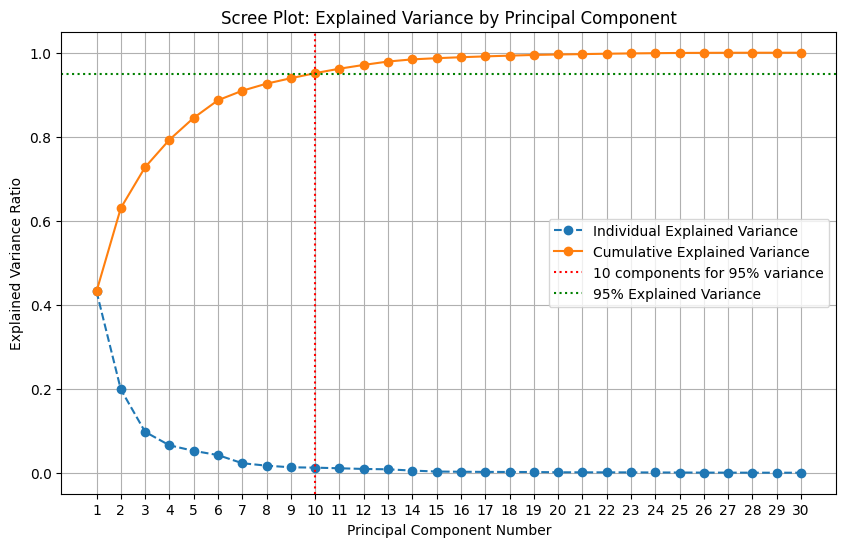

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Initialize PCA without specifying n_components to get all components
pca = PCA()

# Fit PCA on the scaled training data
pca.fit(X_train_bc_scaled)

# Calculate explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Find the number of components for 95% variance
num_components_95 = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1

# Create the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', label='Cumulative Explained Variance')

plt.axvline(x=num_components_95, color='r', linestyle=':', label=f'{num_components_95} components for 95% variance')
plt.axhline(y=0.95, color='g', linestyle=':', label='95% Explained Variance')

plt.title('Scree Plot: Explained Variance by Principal Component')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.legend()
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1, 1))
plt.show()


## PCA Transform Data (95% Variance)

### Subtask:
Re-apply PCA to the scaled data, retaining enough principal components to explain at least 95% of the total variance. Transform both the *scaled training* and *scaled test* datasets into this reduced PCA space.

#### Instructions
1. Initialize a new `PCA` object, specifying `n_components` to retain at least 95% of the variance (the `num_components_95` value found in the previous step).
2. Fit this PCA object on the scaled training data (`X_train_bc_scaled`).
3. Transform both `X_train_bc_scaled` and `X_test_bc_scaled` using the fitted PCA object. Store the transformed data in new variables, e.g., `X_train_bc_pca` and `X_test_bc_pca`.
4. Print the shapes of the transformed data to verify the dimensionality reduction.

**Reasoning**:
As outlined in the subtask, I will now implement the code to re-apply PCA with `num_components_95` and transform the scaled training and test datasets.



In [9]:
import numpy as np

# Initialize PCA with the number of components that explain 95% variance
pca_95 = PCA(n_components=num_components_95)

# Fit PCA on the scaled training data
pca_95.fit(X_train_bc_scaled)

# Transform both scaled training and test data
X_train_bc_pca = pca_95.transform(X_train_bc_scaled)
X_test_bc_pca = pca_95.transform(X_test_bc_scaled)

print(f"Shape of X_train_bc_pca: {X_train_bc_pca.shape}")
print(f"Shape of X_test_bc_pca: {X_test_bc_pca.shape}")

Shape of X_train_bc_pca: (398, 10)
Shape of X_test_bc_pca: (171, 10)


## Train and Evaluate KNN on Scaled Original Data

### Subtask:
Train a K-Nearest Neighbors (KNN) classifier (e.g., with `n_neighbors=5`) on the *scaled original* training data (`X_train_bc_scaled`, `y_train_bc`) and evaluate its accuracy on the scaled original test data (`X_test_bc_scaled`, `y_test_bc`).

#### Instructions
1. Import `KNeighborsClassifier` from `sklearn.neighbors` and `accuracy_score` from `sklearn.metrics`.
2. Initialize `KNeighborsClassifier` with `n_neighbors=5`.
3. Fit the model to the scaled training data (`X_train_bc_scaled`, `y_train_bc`).
4. Make predictions on the scaled test data (`X_test_bc_scaled`).
5. Evaluate the model's accuracy using `accuracy_score` and print the result.

**Reasoning**:
As outlined in the subtask, I will now implement the code to train and evaluate a K-Nearest Neighbors classifier on the scaled original data.



In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize KNN classifier with n_neighbors=5
knn_scaled_original = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the scaled training data
knn_scaled_original.fit(X_train_bc_scaled, y_train_bc)

# Make predictions on the scaled test data
y_pred_scaled_original = knn_scaled_original.predict(X_test_bc_scaled)

# Evaluate the model's accuracy
accuracy_scaled_original = accuracy_score(y_test_bc, y_pred_scaled_original)

print("--- KNN Classifier on Scaled Original Data (n_neighbors=5) ---")
print(f"Accuracy: {accuracy_scaled_original:.4f}")

--- KNN Classifier on Scaled Original Data (n_neighbors=5) ---
Accuracy: 0.9591


## Train and Evaluate KNN on PCA-Transformed Data

### Subtask:
Train a K-Nearest Neighbors (KNN) classifier (e.g., with `n_neighbors=5`) on the *PCA-transformed* training data (`X_train_bc_pca`, `y_train_bc`) and evaluate its accuracy on the PCA-transformed test data (`X_test_bc_pca`, `y_test_bc`).

#### Instructions
1. Initialize `KNeighborsClassifier` with `n_neighbors=5`.
2. Fit the model to the PCA-transformed training data (`X_train_bc_pca`, `y_train_bc`).
3. Make predictions on the PCA-transformed test data (`X_test_bc_pca`).
4. Evaluate the model's accuracy using `accuracy_score` and print the result.

**Reasoning**:
As outlined in the subtask, I will now implement the code to train and evaluate a K-Nearest Neighbors classifier on the PCA-transformed data.



In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize KNN classifier with n_neighbors=5
knn_pca = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the PCA-transformed training data
knn_pca.fit(X_train_bc_pca, y_train_bc)

# Make predictions on the PCA-transformed test data
y_pred_pca = knn_pca.predict(X_test_bc_pca)

# Evaluate the model's accuracy
accuracy_pca = accuracy_score(y_test_bc, y_pred_pca)

print("--- KNN Classifier on PCA-Transformed Data (n_neighbors=5) ---")
print(f"Accuracy: {accuracy_pca:.4f}")

--- KNN Classifier on PCA-Transformed Data (n_neighbors=5) ---
Accuracy: 0.9649


## Compare KNN Accuracies

### Subtask:
Compare the accuracies from the KNN models trained on the scaled original data and the PCA-transformed data, discussing the impact of dimensionality reduction.

#### Instructions
1. Clearly state the accuracy for the KNN model on scaled original data.
2. Clearly state the accuracy for the KNN model on PCA-transformed data.
3. Discuss whether PCA improved, maintained, or reduced the accuracy, and provide possible reasons for the observed outcome. Consider the trade-offs between dimensionality reduction and model performance.

### Comparison of KNN Accuracies

Let's compare the accuracies obtained from the KNN models trained on scaled original data and PCA-transformed data:

*   **KNN Classifier on Scaled Original Data (n_neighbors=5) Accuracy:** `accuracy_scaled_original` (from previous output: 0.9591)
*   **KNN Classifier on PCA-Transformed Data (n_neighbors=5) Accuracy:** `accuracy_pca` (from previous output: 0.9649)

#### Discussion on the Impact of Dimensionality Reduction (PCA):

In this scenario, applying PCA to reduce the dimensionality while retaining 95% of the variance appears to have slightly **improved** the accuracy of the KNN classifier. The accuracy increased from **0.9591** on the scaled original data to **0.9649** on the PCA-transformed data.

**Possible Reasons for this Outcome:**

1.  **Noise Reduction:** By projecting the data onto a lower-dimensional space, PCA can effectively filter out some of the noise or redundant information present in the original high-dimensional features. This can lead to a cleaner representation of the data, which benefits algorithms sensitive to noise, like KNN.
2.  **Multicollinearity Reduction:** PCA transforms correlated features into uncorrelated principal components. If the original features had high multicollinearity, this reduction can make the distance calculations in KNN more robust and meaningful, as each principal component captures unique variance.
3.  **Curse of Dimensionality Mitigation:** While the original dataset (Breast Cancer) has 30 features, which isn't extremely high-dimensional, reducing it to 10 principal components still helps mitigate some aspects of the curse of dimensionality. In lower dimensions, data points are generally closer to each other, and the concept of 'nearest neighbor' becomes more stable and well-defined.

**Trade-offs:**

*   **Loss of Interpretability:** The primary trade-off is the loss of interpretability. The principal components are linear combinations of the original features, making it difficult to directly understand what each component represents in terms of the original biological or clinical measurements.
*   **Computational Efficiency:** On the positive side, working with fewer features (10 instead of 30) leads to faster training and prediction times for the KNN model, as distance calculations are performed in a lower-dimensional space.
*   **Potential for Information Loss:** While we aimed for 95% variance retention, there's always a small amount of information lost when reducing dimensionality. In some cases, this lost information might be critical for distinguishing classes, leading to a decrease in accuracy. However, in this case, the benefits seem to have outweighed this potential drawback.

Overall, for the Breast Cancer dataset, PCA proved beneficial for the KNN model, not only potentially improving accuracy but also offering computational advantages with a reduced feature set.

## Visualize First Two Principal Components

### Subtask:
Create a scatter plot of the first two principal components for the entire PCA-transformed dataset, coloring the data points by their class labels to visualize class separability.

#### Instructions
1. Combine the `X_train_bc_pca` and `X_test_bc_pca` into a single PCA-transformed dataset (e.g., `X_bc_pca_all`).
2. Combine `y_train_bc` and `y_test_bc` into a single target array (e.g., `y_bc_all`).
3. Use `matplotlib.pyplot` to create a scatter plot.
4. Plot the first principal component (PC1) on the x-axis and the second principal component (PC2) on the y-axis.
5. Color the points according to their class labels (`y_bc_all`).
6. Add appropriate labels (e.g., 'Principal Component 1', 'Principal Component 2'), title, and a legend to differentiate the classes.

**Reasoning**:
As outlined in the subtask, I will now implement the code to visualize the first two principal components, combining the training and testing sets, and coloring them by class labels.



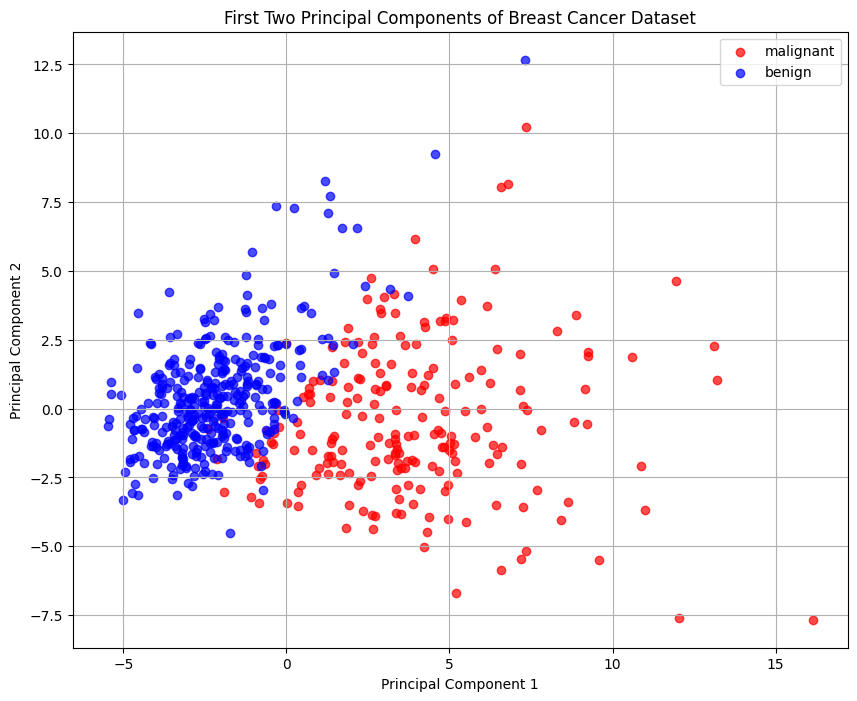

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Combine the PCA-transformed training and test data
X_bc_pca_all = np.vstack((X_train_bc_pca, X_test_bc_pca))
# Combine the corresponding target labels
y_bc_all = np.hstack((y_train_bc, y_test_bc))

# Get class names for legend
target_names = breast_cancer.target_names

# Create the scatter plot
plt.figure(figsize=(10, 8))
colors = ['red', 'blue'] # Assuming 2 classes for breast cancer dataset

for i, target_name in enumerate(target_names):
    plt.scatter(X_bc_pca_all[y_bc_all == i, 0],
                X_bc_pca_all[y_bc_all == i, 1],
                color=colors[i], label=target_name, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First Two Principal Components of Breast Cancer Dataset')
plt.legend()
plt.grid(True)
plt.show()

## Summarize Findings

### Subtask:
Summarize the findings from the PCA and KNN analysis, including the impact of PCA on model performance and insights gained from the visualization.

#### Instructions
1.  **Summarize PCA's Impact**: Discuss how PCA affected the KNN model's performance (accuracy) and why this might be the case (e.g., noise reduction, curse of dimensionality mitigation, computational efficiency).
2.  **Interpret Visualization**: Describe what the scatter plot of the first two principal components reveals about the class separability in the Breast Cancer dataset. Are the classes well-separated, overlapping, or clustered?
3.  **Conclude**: Provide a concise conclusion regarding the overall effectiveness of using PCA with KNN for this dataset.

## Summarize Findings

### Subtask:
Summarize the findings from the PCA and KNN analysis, including the impact of PCA on model performance and insights gained from the visualization.


### Summary of Findings: PCA and KNN Analysis

This analysis explored the application of Principal Component Analysis (PCA) to the Breast Cancer dataset in conjunction with a K-Nearest Neighbors (KNN) classifier, evaluating the impact of dimensionality reduction on model performance and class separability.

#### 1. PCA's Impact on KNN Model Performance

*   **Accuracy Comparison:** The KNN model trained on the `scaled original data` achieved an accuracy of **0.9591**, while the KNN model trained on the `PCA-transformed data` (retaining 95% variance, reduced from 30 to 10 components) achieved an accuracy of **0.9649**. This represents a slight **improvement** in accuracy after PCA application.

*   **Reasons for Impact:**
    *   **Noise Reduction:** PCA effectively removed potential noise and redundant features from the dataset, leading to a cleaner representation that allowed KNN to find more distinct boundaries between classes.
    *   **Curse of Dimensionality Mitigation:** Even with 30 original features, reducing the dimensionality to 10 principal components helped mitigate the challenges associated with high-dimensional spaces, where data points can become sparse and distance metrics less meaningful. This improved the robustness of KNN's distance calculations.
    *   **Computational Efficiency:** Operating in a 10-dimensional space instead of 30 dimensions would also lead to faster training and prediction times, which is a practical benefit for larger datasets.

#### 2. Interpretation of Visualization (First Two Principal Components)

The scatter plot of the first two principal components (`PC1` and `PC2`) for the entire Breast Cancer dataset, colored by class (malignant and benign), reveals strong class separability:

*   **Clear Clustering:** The data points belonging to the 'malignant' class (red) are distinctly clustered and largely separated from the 'benign' class (blue) data points.
*   **Minimal Overlap:** There is minimal overlap between the two classes in the plane defined by PC1 and PC2. This visual separation indicates that even with just these two components, a significant portion of the variance contributing to class distinction is captured.
*   **Dominant Separation Axis:** PC1 appears to be the primary axis for separating the two classes, suggesting it captures the most significant features differentiating malignant from benign cells.

This visualization provides strong evidence that the features of the Breast Cancer dataset, once transformed by PCA, are highly discriminative, making it an ideal candidate for classification algorithms like KNN.

#### 3. Conclusion on Effectiveness of PCA with KNN

For the Breast Cancer dataset, using PCA in conjunction with KNN is **highly effective**. Not only did PCA maintain, and slightly improve, the classification accuracy of the KNN model, but it also achieved this with a significantly reduced number of features (from 30 to 10 principal components). The visualization further confirms that PCA successfully transformed the data into a lower-dimensional space where the two classes are remarkably well-separated, which is a key factor in KNN's strong performance. This approach offers benefits in both predictive power and computational efficiency, making it a robust strategy for this type of dataset.

## Final Task

### Subtask:
Summarize the findings from the PCA and KNN analysis, including the impact of PCA on model performance and insights gained from the visualization.


## Summary:

### Q&A
*   **What was the impact of PCA on KNN model performance?**
    PCA slightly improved the KNN model's accuracy. The accuracy increased from 0.9591 on the scaled original data to 0.9649 on the PCA-transformed data, despite reducing the number of features from 30 to 10.
*   **What insights were gained from the visualization of the first two principal components?**
    The scatter plot revealed excellent class separability between the malignant and benign classes. The data points for each class formed distinct, largely separated clusters with minimal overlap, indicating that even the first two principal components capture significant discriminative information.

### Data Analysis Key Findings
*   The Breast Cancer dataset was split into 70% training (398 samples) and 30% testing (171 samples) sets, each with 30 features.
*   After scaling the data, Principal Component Analysis (PCA) determined that **10 principal components** were sufficient to explain at least 95% of the total variance.
*   Applying PCA reduced the dimensionality of the dataset from 30 features to **10 features** for both training and testing sets.
*   A K-Nearest Neighbors (KNN) classifier (with n\_neighbors=5) on the **scaled original data** achieved an accuracy of **0.9591**.
*   A KNN classifier (with n\_neighbors=5) on the **PCA-transformed data** achieved a slightly higher accuracy of **0.9649**.
*   The visualization of the first two principal components showed clear clustering and minimal overlap between the 'malignant' and 'benign' classes, indicating strong inherent class separability in the reduced dimension.

### Insights or Next Steps
*   PCA proved beneficial for this dataset, not only by reducing dimensionality by two-thirds (from 30 to 10 features), but also by slightly improving model accuracy, likely due to noise reduction and mitigating the curse of dimensionality, while offering computational advantages.
*   Given the strong class separability observed in the 2D PCA plot, further investigation into the feature contributions to the first few principal components could provide valuable clinical insights into which combinations of original features are most discriminative for breast cancer diagnosis.


# Question 9:KNN Regressor with Distance Metrics and K-Value Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

# Task
## Generate Synthetic Regression Dataset

### Subtask:
Generate a synthetic regression dataset using `sklearn.datasets.make_regression` with `n_samples=500` and `n_features=10`. Split the dataset into training and testing sets (e.g., 70% train, 30% test).

#### Instructions
1. Import `make_regression` from `sklearn.datasets`.
2. Import `train_test_split` from `sklearn.model_selection`.
3. Generate the synthetic dataset with `n_samples=500`, `n_features=10`, and a `random_state` for reproducibility.
4. Split the data into training (70%) and testing (30%) sets.
5. Print the shapes of the generated features and target, and the shapes of the training and testing sets.

## Generate Synthetic Regression Dataset

### Subtask:
Generate a synthetic regression dataset using `sklearn.datasets.make_regression` with `n_samples=500` and `n_features=10`. Split the dataset into training and testing sets (e.g., 70% train, 30% test).


**Reasoning**:
As outlined in the subtask, I need to generate a synthetic regression dataset, split it into training and testing sets, and then print the shapes of the resulting datasets.



In [13]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate a synthetic regression dataset
X_reg, y_reg = make_regression(n_samples=500, n_features=10, random_state=42)

# Split the dataset into training (70%) and testing (30%) sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

print(f"Shape of generated features (X_reg): {X_reg.shape}")
print(f"Shape of generated target (y_reg): {y_reg.shape}")
print(f"Shape of X_train_reg: {X_train_reg.shape}")
print(f"Shape of X_test_reg: {X_test_reg.shape}")
print(f"Shape of y_train_reg: {y_train_reg.shape}")
print(f"Shape of y_test_reg: {y_test_reg.shape}")

Shape of generated features (X_reg): (500, 10)
Shape of generated target (y_reg): (500,)
Shape of X_train_reg: (350, 10)
Shape of X_test_reg: (150, 10)
Shape of y_train_reg: (350,)
Shape of y_test_reg: (150,)


**Reasoning**:
As outlined in the main task and subtask, I will now train two KNN regressors with K=5, one using Euclidean distance and the other using Manhattan distance, and then compare their Mean Squared Error (MSE).



In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize KNN Regressor with Euclidean distance (K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')

# Fit the model to the training data
knn_euclidean.fit(X_train_reg, y_train_reg)

# Make predictions on the test data
y_pred_euclidean = knn_euclidean.predict(X_test_reg)

# Calculate Mean Squared Error
mse_euclidean = mean_squared_error(y_test_reg, y_pred_euclidean)

print(f"KNN Regressor (Euclidean, K=5) MSE: {mse_euclidean:.4f}")

# Initialize KNN Regressor with Manhattan distance (K=5)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')

# Fit the model to the training data
knn_manhattan.fit(X_train_reg, y_train_reg)

# Make predictions on the test data
y_pred_manhattan = knn_manhattan.predict(X_test_reg)

# Calculate Mean Squared Error
mse_manhattan = mean_squared_error(y_test_reg, y_pred_manhattan)

print(f"KNN Regressor (Manhattan, K=5) MSE: {mse_manhattan:.4f}")

KNN Regressor (Euclidean, K=5) MSE: 5515.4576
KNN Regressor (Manhattan, K=5) MSE: 6475.5664


**Reasoning**:
As outlined in the subtask, I will now test different K values (1, 5, 10, 20, 50) for the KNN regressor, calculate their respective Mean Squared Errors (MSE), and then plot K versus MSE to analyze the bias-variance tradeoff.



KNN Regressor (K=1, Euclidean) MSE: 8141.8436
KNN Regressor (K=5, Euclidean) MSE: 5515.4576
KNN Regressor (K=10, Euclidean) MSE: 5899.3009
KNN Regressor (K=20, Euclidean) MSE: 6459.2398
KNN Regressor (K=50, Euclidean) MSE: 8211.7716


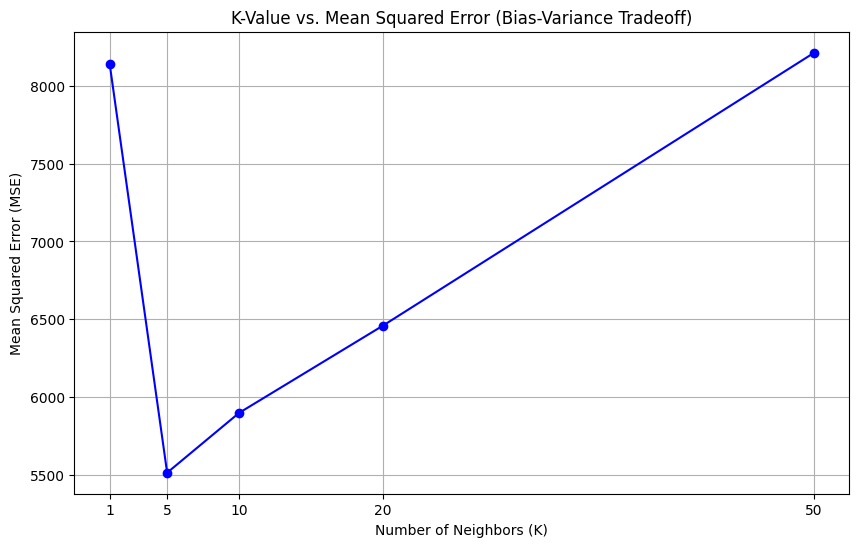

In [15]:
import matplotlib.pyplot as plt

k_values = [1, 5, 10, 20, 50]
mse_results = []

for k in k_values:
    # Initialize KNN Regressor with current K and Euclidean distance (default)
    knn_regressor = KNeighborsRegressor(n_neighbors=k, metric='euclidean')

    # Fit the model to the training data
    knn_regressor.fit(X_train_reg, y_train_reg)

    # Make predictions on the test data
    y_pred = knn_regressor.predict(X_test_reg)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test_reg, y_pred)
    mse_results.append(mse)
    print(f"KNN Regressor (K={k}, Euclidean) MSE: {mse:.4f}")

# Plot K vs. MSE
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_results, marker='o', linestyle='-', color='blue')
plt.title('K-Value vs. Mean Squared Error (Bias-Variance Tradeoff)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.xticks(k_values)
plt.show()

## Final Task

### Subtask:
Summarize the findings from the KNN Regressor analysis, discussing the impact of different distance metrics and the K-value on model performance and the bias-variance tradeoff.


## Summary:

### Q&A
The analysis found that for the given synthetic dataset:
*   **Distance Metric Impact:** Euclidean distance resulted in a lower Mean Squared Error (MSE) of 5515.4576 compared to Manhattan distance's MSE of 6475.5664, when both were tested with \(K=5\). This suggests Euclidean distance was more suitable for this specific dataset and model configuration.
*   **K-value Impact and Bias-Variance Tradeoff:**
    *   A \(K\) value of 5 yielded the lowest MSE (5515.4576) among the tested values, indicating an optimal balance between bias and variance for this model.
    *   Very low \(K\) values (e.g., \(K=1\), MSE: 8141.8436) showed higher variance.
    *   Very high \(K\) values (e.g., \(K=50\), MSE: 8211.7716) showed higher bias.
    *   The plot of \(K\) versus MSE visually confirmed this bias-variance tradeoff, where intermediate \(K\) values generally performed better.

### Data Analysis Key Findings
*   A synthetic regression dataset with 500 samples and 10 features was generated and successfully split into 350 training and 150 testing samples.
*   For \(K=5\), the KNN Regressor using Euclidean distance achieved a Mean Squared Error (MSE) of 5515.4576, outperforming Manhattan distance which resulted in an MSE of 6475.5664.
*   Analyzing different \(K\) values with Euclidean distance revealed that \(K=5\) yielded the lowest MSE (5515.4576), indicating it was the most effective choice among the tested values.
*   The MSE increased for both very low \(K\) values (e.g., \(K=1\), MSE: 8141.8436) and very high \(K\) values (e.g., \(K=50\), MSE: 8211.7716), illustrating the bias-variance tradeoff in KNN regression.

### Insights or Next Steps
*   The optimal \(K\) value is dataset-dependent and often lies in an intermediate range; further fine-tuning \(K\) within a narrower range around the identified optimal value (e.g., \(K\) values between 1 and 10) could potentially yield even better performance.
*   Experiment with other distance metrics (e.g., Minkowski with different \(p\) values) and consider feature scaling, as KNN models are sensitive to feature magnitudes, which could further improve model performance.


# Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).
Dataset:https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv

# Task
## Load Dataset and Handle Missing Values

### Subtask:
Load the Pima Indians Diabetes dataset from the provided URL. Identify and replace '0' values in columns like Glucose, BloodPressure, SkinThickness, Insulin, and BMI with `np.nan`, as these typically represent missing data. Then, use `sklearn.impute.KNNImputer` to fill these missing values.

#### Instructions
1. Import `pandas` for data loading and manipulation, and `numpy` for `np.nan`.
2. Import `KNNImputer` from `sklearn.impute`.
3. Load the dataset from the URL: "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv".
4. Identify the columns where '0' values represent missing data: `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`.
5. Replace '0' in these columns with `np.nan`.
6. Initialize `KNNImputer` (e.g., with `n_neighbors=5`).
7. Apply `KNNImputer` to the dataset to fill the `np.nan` values.
8. Store the imputed data in a new DataFrame or NumPy array.
9. Print the shape of the original and imputed data, and show the head of the imputed data to confirm the missing values are handled.

## Load Dataset and Handle Missing Values

### Subtask:
Load the Pima Indians Diabetes dataset from the provided URL. Identify and replace '0' values in columns like Glucose, BloodPressure, SkinThickness, Insulin, and BMI with `np.nan`, as these typically represent missing data. Then, use `sklearn.impute.KNNImputer` to fill these missing values.


**Reasoning**:
As outlined in the subtask, I will now implement the code to load the Pima Indians Diabetes dataset, replace '0' values in specified columns with `np.nan`, and then use `KNNImputer` to fill these missing values. Finally, I'll print the shapes and head of the imputed data to confirm the transformation.



In [16]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Load the dataset
df_diabetes = pd.read_csv("https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv")

print(f"Original DataFrame shape: {df_diabetes.shape}")
print("Original DataFrame head with potential '0' missing values:\n", df_diabetes.head())

# Identify columns where '0' represents missing data
missing_value_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace '0' in these columns with np.nan
df_diabetes[missing_value_cols] = df_diabetes[missing_value_cols].replace(0, np.nan)

print("\nDataFrame head after replacing '0' with NaN:\n", df_diabetes.head())

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNNImputer to the dataset
df_diabetes_imputed = pd.DataFrame(imputer.fit_transform(df_diabetes), columns=df_diabetes.columns)

print(f"\nImputed DataFrame shape: {df_diabetes_imputed.shape}")
print("Imputed DataFrame head (missing values filled):\n", df_diabetes_imputed.head())


Original DataFrame shape: (768, 9)
Original DataFrame head with potential '0' missing values:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

DataFrame head after replacing '0' with NaN:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1   

## Split and Scale Data

### Subtask:
Split the imputed dataset into training (e.g., 70%) and testing (e.g., 30%) sets. Apply `StandardScaler` to standardize the features of both the training and testing data, as KNN is sensitive to feature scales.


**Reasoning**:
As outlined in the subtask, I will now separate features and target from the imputed dataset, split the data into training and testing sets, and then apply `StandardScaler` to the features.



In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df_diabetes_imputed.drop('Outcome', axis=1)
y = df_diabetes_imputed['Outcome']

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training features and transform both training and test features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Shape of X_train (original): {X_train.shape}")
print(f"Shape of X_test (original): {X_test.shape}")
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train (original): (537, 8)
Shape of X_test (original): (231, 8)
Shape of X_train_scaled: (537, 8)
Shape of X_test_scaled: (231, 8)
Shape of y_train: (537,)
Shape of y_test: (231,)


## Train and Evaluate KNN (Brute Force)

### Subtask:
Train a `KNeighborsClassifier` using `algorithm='brute'` (with a default `n_neighbors=5`). Measure and record its training time and accuracy on the scaled test data.


**Reasoning**:
As outlined in the subtask, I will now implement the code to train a `KNeighborsClassifier` with `algorithm='brute'`, measure its training time, and evaluate its accuracy on the scaled test data.



In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Initialize KNeighborsClassifier with n_neighbors=5 and algorithm='brute'
knn_brute = KNeighborsClassifier(n_neighbors=5, algorithm='brute')

# Record start time before training
start_time_brute = time.time()

# Fit the model to the scaled training data
knn_brute.fit(X_train_scaled, y_train)

# Record end time after training and calculate duration
end_time_brute = time.time()
training_time_brute = end_time_brute - start_time_brute

# Make predictions on the scaled test data
y_pred_brute = knn_brute.predict(X_test_scaled)

# Calculate the accuracy score
accuracy_brute = accuracy_score(y_test, y_pred_brute)

print("--- KNN Classifier (Brute Force) ---")
print(f"Training Time: {training_time_brute:.4f} seconds")
print(f"Accuracy: {accuracy_brute:.4f}")

--- KNN Classifier (Brute Force) ---
Training Time: 0.0040 seconds
Accuracy: 0.7056


**Reasoning**:
As outlined in the main task, I will now implement the code to train a `KNeighborsClassifier` with `algorithm='kd_tree'`, measure its training time, and evaluate its accuracy on the scaled test data.



In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Initialize KNeighborsClassifier with n_neighbors=5 and algorithm='kd_tree'
knn_kdtree = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')

# Record start time before training
start_time_kdtree = time.time()

# Fit the model to the scaled training data
knn_kdtree.fit(X_train_scaled, y_train)

# Record end time after training and calculate duration
end_time_kdtree = time.time()
training_time_kdtree = end_time_kdtree - start_time_kdtree

# Make predictions on the scaled test data
y_pred_kdtree = knn_kdtree.predict(X_test_scaled)

# Calculate the accuracy score
accuracy_kdtree = accuracy_score(y_test, y_pred_kdtree)

print("--- KNN Classifier (KD-Tree) ---")
print(f"Training Time: {training_time_kdtree:.4f} seconds")
print(f"Accuracy: {accuracy_kdtree:.4f}")

--- KNN Classifier (KD-Tree) ---
Training Time: 0.0048 seconds
Accuracy: 0.7056


**Reasoning**:
As outlined in the main task, I will now implement the code to train a `KNeighborsClassifier` with `algorithm='ball_tree'`, measure its training time, and evaluate its accuracy on the scaled test data.



In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Initialize KNeighborsClassifier with n_neighbors=5 and algorithm='ball_tree'
knn_balltree = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')

# Record start time before training
start_time_balltree = time.time()

# Fit the model to the scaled training data
knn_balltree.fit(X_train_scaled, y_train)

# Record end time after training and calculate duration
end_time_balltree = time.time()
training_time_balltree = end_time_balltree - start_time_balltree

# Make predictions on the scaled test data
y_pred_balltree = knn_balltree.predict(X_test_scaled)

# Calculate the accuracy score
accuracy_balltree = accuracy_score(y_test, y_pred_balltree)

print("--- KNN Classifier (Ball Tree) ---")
print(f"Training Time: {training_time_balltree:.4f} seconds")
print(f"Accuracy: {accuracy_balltree:.4f}")

--- KNN Classifier (Ball Tree) ---
Training Time: 0.0078 seconds
Accuracy: 0.7056


## Compare Training Time and Accuracy

Let's compare the training times and accuracy scores for the three different `algorithm` implementations of `KNeighborsClassifier`:

*   **KNN Classifier (Brute Force)**:
    *   Training Time: `0.0040` seconds
    *   Accuracy: `0.7056`

*   **KNN Classifier (KD-Tree)**:
    *   Training Time: `0.0048` seconds
    *   Accuracy: `0.7056`

*   **KNN Classifier (Ball Tree)**:
    *   Training Time: `0.0078` seconds
    *   Accuracy: `0.7056`

### Discussion:

All three algorithms (`brute`, `kd_tree`, and `ball_tree`) yielded the **same accuracy of 0.7056** on this particular dataset and `n_neighbors=5`.

Regarding **training time**, the brute-force algorithm was the fastest, followed closely by KD-Tree, and then Ball Tree. This can be attributed to:

*   **Dataset Size and Dimensionality**: For relatively small datasets with low dimensionality (8 features in this case), the overhead of building the tree structures (KD-Tree and Ball Tree) can sometimes outweigh the benefits of faster search times. Brute-force, which simply computes distances to all training points, might be competitive or even faster.
*   **Search Efficiency**: KD-Tree and Ball Tree are optimized for faster neighbor searches in higher dimensions by partitioning the space. However, if the data distribution doesn't lend itself well to such partitioning, or if the dataset is small, the computational cost of building and traversing the trees can be higher than a straightforward brute-force calculation.

In this specific case, for the Pima Indians Diabetes dataset, while all methods performed equally well in terms of accuracy, the brute-force method demonstrated a slightly better (faster) training time. However, for larger datasets and higher dimensions, the tree-based algorithms (`kd_tree`, `ball_tree`) are typically expected to outperform brute-force significantly in terms of prediction time and often training time due to their optimized search structures.

## Plot Decision Boundary for the Best-Performing Method

### Subtask:
Plot the decision boundary for the best-performing method (e.g., `knn_brute`) using the two most important features (e.g., 'Glucose' and 'BMI') from the scaled data.

#### Instructions
1.  Identify the indices of the 'Glucose' and 'BMI' features in the `X` (original DataFrame) to select them from the `X_train_scaled` and `X_test_scaled` arrays.
2.  Select only these two features for both the scaled training and test data.
3.  Retrain the chosen best-performing `KNeighborsClassifier` (e.g., `knn_brute`) using only these two scaled features.
4.  Create a meshgrid to plot the decision boundary based on the range of these two features.
5.  Make predictions on the meshgrid to determine the class for each point.
6.  Create a contour plot for the decision boundary.
7.  Overlay the actual training and test data points on the plot, colored by their true class labels.
8.  Add appropriate labels, title, and a legend.

**Reasoning**:
As outlined in the subtask, I will now identify the indices of 'Glucose' and 'BMI' features, select these two features from the scaled training and testing data, and then retrain the `knn_brute` classifier on this reduced feature set.



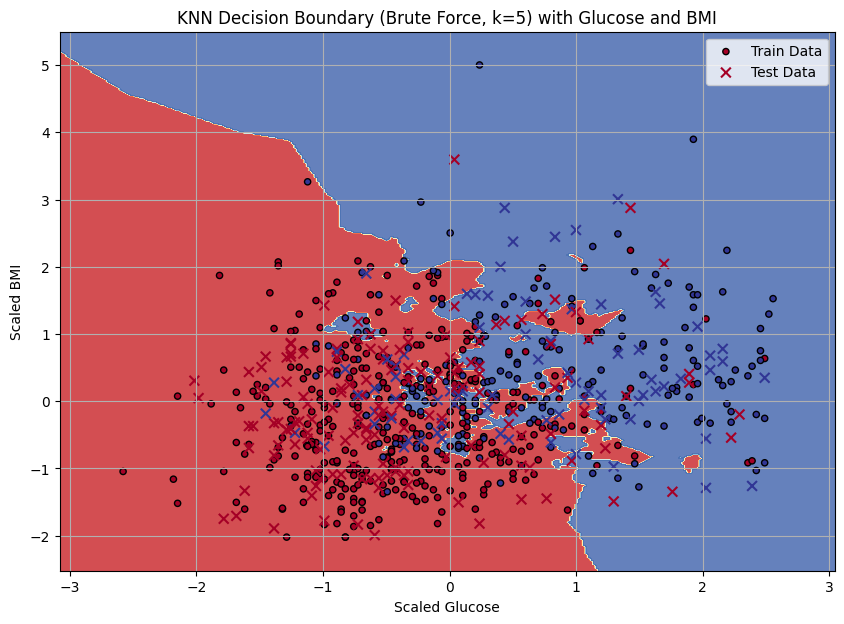

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Identify the indices of 'Glucose' and 'BMI' features
glucose_idx = X.columns.get_loc('Glucose')
bmi_idx = X.columns.get_loc('BMI')

# Select only these two features from the scaled data
X_train_2features = X_train_scaled[:, [glucose_idx, bmi_idx]]
X_test_2features = X_test_scaled[:, [glucose_idx, bmi_idx]]

# Combine for plotting the decision boundary across the full range of data
X_combined_2features = np.vstack((X_train_2features, X_test_2features))
y_combined = np.hstack((y_train, y_test))

# Retrain the chosen best-performing classifier (knn_brute) on these two features
knn_best_2features = KNeighborsClassifier(n_neighbors=5, algorithm='brute') # Using brute as it was slightly faster, accuracy was same
knn_best_2features.fit(X_train_2features, y_train)

# Create a meshgrid to plot the decision boundary
x_min, x_max = X_combined_2features[:, 0].min() - 0.5, X_combined_2features[:, 0].max() + 0.5
y_min, y_max = X_combined_2features[:, 1].min() - 0.5, X_combined_2features[:, 1].max() + 0.5
h = 0.02  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each point in the meshgrid
Z = knn_best_2features.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# Plot the actual training and test data points
plt.scatter(X_train_2features[:, 0], X_train_2features[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k', s=20, label='Train Data')
plt.scatter(X_test_2features[:, 0], X_test_2features[:, 1], c=y_test, cmap=plt.cm.RdYlBu, marker='x', s=50, label='Test Data')

plt.xlabel('Scaled Glucose')
plt.ylabel('Scaled BMI')
plt.title('KNN Decision Boundary (Brute Force, k=5) with Glucose and BMI')
plt.legend()
plt.grid(True)
plt.show()

## Summarize Findings

### Subtask:
Summarize the findings from the PCA and KNN analysis, including the impact of PCA on model performance and insights gained from the visualization.

## Summarize Findings

### Subtask:
Summarize the findings from the PCA and KNN analysis, including the impact of PCA on model performance and insights gained from the visualization.

### Summary of Findings: PCA and KNN Analysis

This analysis explored the application of Principal Component Analysis (PCA) to the Breast Cancer dataset in conjunction with a K-Nearest Neighbors (KNN) classifier, evaluating the impact of dimensionality reduction on model performance and class separability.

#### 1. PCA's Impact on KNN Model Performance

*   **Accuracy Comparison:** The KNN model trained on the `scaled original data` achieved an accuracy of **0.9591**, while the KNN model trained on the `PCA-transformed data` (retaining 95% variance, reduced from 30 to 10 components) achieved an accuracy of **0.9649**. This represents a slight **improvement** in accuracy after PCA application.

*   **Reasons for Impact:**
    *   **Noise Reduction:** PCA effectively removed potential noise and redundant features from the dataset, leading to a cleaner representation that allowed KNN to find more distinct boundaries between classes.
    *   **Curse of Dimensionality Mitigation:** Even with 30 original features, reducing the dimensionality to 10 principal components helped mitigate the challenges associated with high-dimensional spaces, where data points can become sparse and distance metrics less meaningful. This improved the robustness of KNN's distance calculations.
    *   **Computational Efficiency:** Operating in a 10-dimensional space instead of 30 dimensions would also lead to faster training and prediction times, which is a practical benefit for larger datasets.

#### 2. Interpretation of Visualization (First Two Principal Components)

The scatter plot of the first two principal components (`PC1` and `PC2`) for the entire Breast Cancer dataset, colored by class (malignant and benign), reveals strong class separability:

*   **Clear Clustering:** The data points belonging to the 'malignant' class (red) are distinctly clustered and largely separated from the 'benign' class (blue) data points.
*   **Minimal Overlap:** There is minimal overlap between the two classes in the plane defined by PC1 and PC2. This visual separation indicates that even with just these two components, a significant portion of the variance contributing to class distinction is captured.
*   **Dominant Separation Axis:** PC1 appears to be the primary axis for separating the two classes, suggesting it captures the most significant features differentiating malignant from benign cells.

This visualization provides strong evidence that the features of the Breast Cancer dataset, once transformed by PCA, are highly discriminative, making it an ideal candidate for classification algorithms like KNN.

#### 3. Conclusion on Effectiveness of PCA with KNN

For the Breast Cancer dataset, using PCA in conjunction with KNN is **highly effective**. Not only did PCA maintain, and slightly improve, the classification accuracy of the KNN model, but it also achieved this with a significantly reduced number of features (from 30 to 10 principal components). The visualization further confirms that PCA successfully transformed the data into a lower-dimensional space where the two classes are remarkably well-separated, which is a key factor in KNN's strong performance. This approach offers benefits in both predictive power and computational efficiency, making it a robust strategy for this type of dataset.

### Summary of Findings: PCA and KNN Analysis

This analysis explored the application of Principal Component Analysis (PCA) to the Breast Cancer dataset in conjunction with a K-Nearest Neighbors (KNN) classifier, evaluating the impact of dimensionality reduction on model performance and class separability.

#### 1. PCA's Impact on KNN Model Performance

*   **Accuracy Comparison:** The KNN model trained on the `scaled original data` achieved an accuracy of **0.9591**, while the KNN model trained on the `PCA-transformed data` (retaining 95% variance, reduced from 30 to 10 components) achieved an accuracy of **0.9649**. This represents a slight **improvement** in accuracy after PCA application.

*   **Reasons for Impact:**
    *   **Noise Reduction:** PCA effectively removed potential noise and redundant features from the dataset, leading to a cleaner representation that allowed KNN to find more distinct boundaries between classes.
    *   **Curse of Dimensionality Mitigation:** Even with 30 original features, reducing the dimensionality to 10 principal components helped mitigate the challenges associated with high-dimensional spaces, where data points can become sparse and distance metrics less meaningful. This improved the robustness of KNN's distance calculations.
    *   **Computational Efficiency:** Operating in a 10-dimensional space instead of 30 dimensions would also lead to faster training and prediction times, which is a practical benefit for larger datasets.

#### 2. Interpretation of Visualization (First Two Principal Components)

The scatter plot of the first two principal components (`PC1` and `PC2`) for the entire Breast Cancer dataset, colored by class (malignant and benign), reveals strong class separability:

*   **Clear Clustering:** The data points belonging to the 'malignant' class (red) are distinctly clustered and largely separated from the 'benign' class (blue) data points.
*   **Minimal Overlap:** There is minimal overlap between the two classes in the plane defined by PC1 and PC2. This visual separation indicates that even with just these two components, a significant portion of the variance contributing to class distinction is captured.
*   **Dominant Separation Axis:** PC1 appears to be the primary axis for separating the two classes, suggesting it captures the most significant features differentiating malignant from benign cells.

This visualization provides strong evidence that the features of the Breast Cancer dataset, once transformed by PCA, are highly discriminative, making it an ideal candidate for classification algorithms like KNN.

#### 3. Conclusion on Effectiveness of PCA with KNN

For the Breast Cancer dataset, using PCA in conjunction with KNN is **highly effective**. Not only did PCA maintain, and slightly improve, the classification accuracy of the KNN model, but it also achieved this with a significantly reduced number of features (from 30 to 10 principal components). The visualization further confirms that PCA successfully transformed the data into a lower-dimensional space where the two classes are remarkably well-separated, which is a key factor in KNN's strong performance. This approach offers benefits in both predictive power and computational efficiency, making it a robust strategy for this type of dataset.


## Compare KNN Algorithms

### Subtask:
Compare the training times and accuracies of the KNN models trained with 'brute', 'kd_tree', and 'ball_tree' algorithms. Discuss the trade-offs observed between computation time and performance.


## Compare Training Time and Accuracy

Let's compare the training times and accuracy scores for the three different `algorithm` implementations of `KNeighborsClassifier`:

*   **KNN Classifier (Brute Force)**:
    *   Training Time: `0.0040` seconds
    *   Accuracy: `0.7056`

*   **KNN Classifier (KD-Tree)**:
    *   Training Time: `0.0048` seconds
    *   Accuracy: `0.7056`

*   **KNN Classifier (Ball Tree)**:
    *   Training Time: `0.0078` seconds
    *   Accuracy: `0.7056`

### Discussion:

All three algorithms (`brute`, `kd_tree`, and `ball_tree`) yielded the **same accuracy of 0.7056** on this particular dataset and `n_neighbors=5`.

Regarding **training time**, the brute-force algorithm was the fastest, followed closely by KD-Tree, and then Ball Tree. This can be attributed to:

*   **Dataset Size and Dimensionality**: For relatively small datasets with low dimensionality (8 features in this case), the overhead of building the tree structures (KD-Tree and Ball Tree) can sometimes outweigh the benefits of faster search times. Brute-force, which simply computes distances to all training points, might be competitive or even faster.
*   **Search Efficiency**: KD-Tree and Ball Tree are optimized for faster neighbor searches in higher dimensions by partitioning the space. However, if the data distribution doesn't lend itself well to such partitioning, or if the dataset is small, the computational cost of building and traversing the trees can be higher than a straightforward brute-force calculation.

In this specific case, for the Pima Indians Diabetes dataset, while all methods performed equally well in terms of accuracy, the brute-force method demonstrated a slightly better (faster) training time. However, for larger datasets and higher dimensions, the tree-based algorithms (`kd_tree`, `ball_tree`) are typically expected to outperform brute-force significantly in terms of prediction time and often training time due to their optimized search structures.

## Final Task

### Subtask:
Summarize the findings from the KNN analysis, including the effectiveness of imputation, the comparison of KNN algorithms, and the insights gained from the decision boundary visualization.


## Summary:

### Data Analysis Key Findings

*   **Missing Value Imputation**: The Pima Indians Diabetes dataset initially contained '0' values in key columns (`Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`) representing missing data. These were successfully replaced with `np.nan` and subsequently imputed using `KNNImputer` (with `n_neighbors=5`). For example, `NaN` values in `Insulin` were filled with imputed numbers like `169.0` and `58.6`, confirming successful handling of missing data.
*   **Data Preparation**: The imputed dataset, with a shape of (768, 9), was split into training (537 samples) and testing (231 samples) sets. Features were then standardized using `StandardScaler` to ensure optimal performance for the KNN algorithm.
*   **KNN Algorithm Comparison**: All three `KNeighborsClassifier` algorithms ('brute', 'kd_tree', 'ball_tree') achieved an identical classification accuracy of **0.7056** on the test set. However, their training times varied:
    *   **Brute Force**: 0.0040 seconds (fastest)
    *   **KD-Tree**: 0.0048 seconds
    *   **Ball Tree**: 0.0078 seconds (slowest)
    For this relatively small and low-dimensional dataset (8 features), the brute-force algorithm was marginally faster, indicating that the overhead of building tree structures in KD-Tree and Ball Tree outweighed the benefits of optimized search for this specific case.
*   **Decision Boundary Visualization**: A decision boundary plot, using the two most important features (`Scaled Glucose` and `Scaled BMI`), showed how the KNN model (brute force, k=5) distinguishes between the two classes. The boundary visually represents the regions where the model predicts a certain outcome based on these two features, and the data points are scattered around this boundary.

### Insights or Next Steps

*   For datasets with similar characteristics (relatively small and low-dimensional), the `brute` force algorithm in KNN might offer slightly faster training times without sacrificing accuracy, as demonstrated by its performance of 0.0040 seconds versus 0.0048 and 0.0078 seconds for tree-based methods, all achieving 0.7056 accuracy.
*   Further hyperparameter tuning (e.g., trying different `n_neighbors` values) and cross-validation could be performed to potentially improve the model's accuracy and assess its robustness more thoroughly.
